In [124]:
# -*- coding: utf-8 -*-  
%matplotlib inline
import numpy as np
import pandas as pd

##  基本概念

两种数据结构
1. Series  带标签的一维数组
2. DataFrame   二维表

##  基础操作

In [242]:
se1 = pd.Series([1,2,3])

#internal numpy array
se1.values

se2 = pd.Series(np.random.random(10))

df1 = pd.DataFrame(np.random.random((10,10))*10)
#internal numpy array
df1.values
#转置
df1.T
#转成int类型
df1.astype(int)
#按索引取
df1[0][0]

#给每行起一个名字
df1.index=[i for i in 'ABCDEFGHIJ']

#给每列起一个名字
df1.columns=[i for i in 'ABCDEFGHIJ']

#给df增加列
df1['add']=np.zeros(10)

#按列求和
df1.sum(axis=0)
#按行求和
df1.sum(axis=1)

#按名称取
df1['A']['A']


2.1845729126608262

In [261]:
df2 = pd.DataFrame(np.random.random((2,10)))

df2.index=[i for i in 'KL']
df2.columns=[i for i in 'ABCDEFGHIJ']
#合并两个df1,df2到一起
x = pd.concat([df1,df2])


pandas.core.series.Series

In [110]:

#从csv文件中读取，默认第一行为列名
data=pd.read_csv('data/train.csv')
#写入csv文件
to_csv('./data/weather_2012.csv')
#带时间格式的解析
#df = pd.read_csv('../data/bikes.csv', sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')


#列名
data.columns
data.index
data.values

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [239]:
#查看每列的数据类型
data.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [248]:
## 按索引选择
#取10到19行，所有列
data[10:20]
#取10到19行

#按列名取
#只取Pclass
data[10:20]['Pclass']
data.Pclass[10:20]
#选择多列
data[10:20][['Pclass','Age']]
data[['Pclass','Age']][10:20]


#注意以下两种方式的差别
data[['Pclass']][10:20]
data.Pclass[10:20]


## 按条件选择
#取Age=28的所有
data[data['Age']==28 ]
#取Age=28 and Survived=1 
data[(data['Age']==28) & (data['Survived']==1 )]

#字符串类型判断
data['Name'].str.contains("Davi")



0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Name, dtype: bool

array([ 22.  ,  38.  ,  26.  ,  35.  ,    nan,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  30.  ,
        33.  ,  23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,
        14.5 ,  70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,
        40.5 ,  44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,
        20.5 ,  62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,
        60.  ,  10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,
        80.  ,  70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

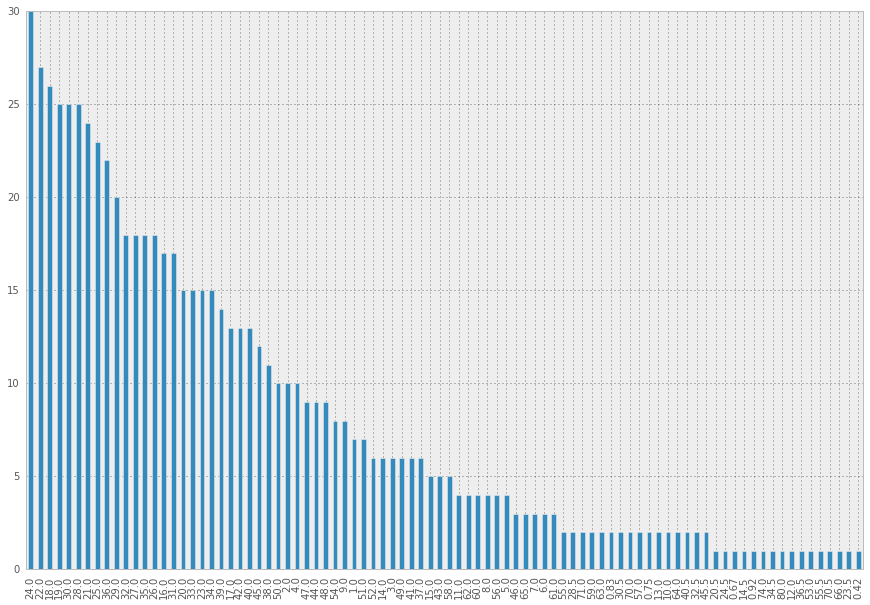

In [257]:
#统计年龄
data['Age'].value_counts().plot(figsize=(15, 10),kind="bar")

#取重
data['Age'].unique()

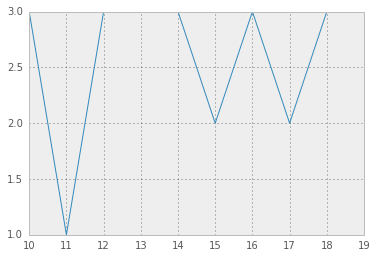

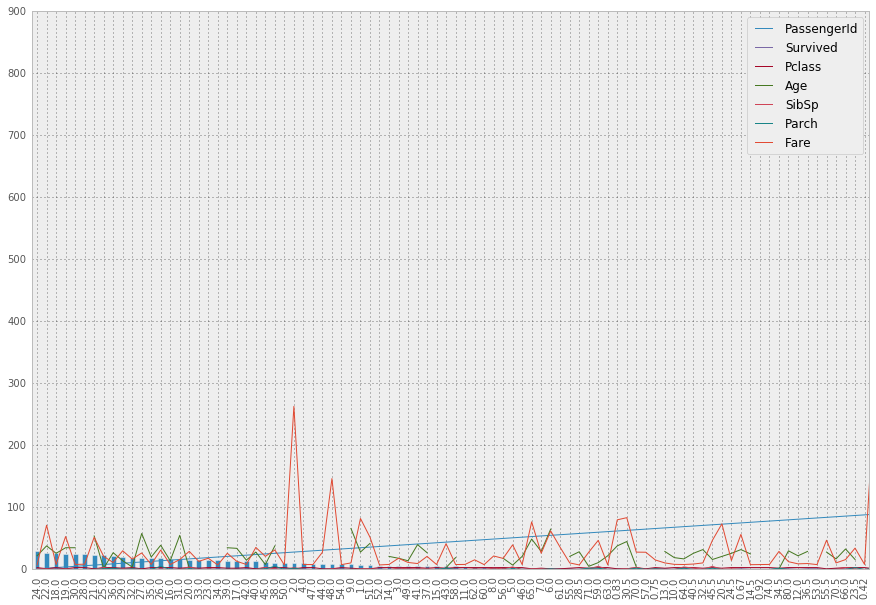

In [160]:
#取数并画图
data['Pclass'][10:20].plot()

#所有数据
data.plot(figsize=(15, 10))



In [113]:
#前10行
data.head(2)
#最后3行
data.tail(3)
#取样
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
134,135,0,2,"Sobey, Mr. Samuel James Hayden",male,25.0,0,0,C.A. 29178,13.0000,NaN,S
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.4250,NaN,C
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S


In [74]:
#数据分布，行数，均值，标准差等等
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


CPU times: user 7.49 ms, sys: 10.6 ms, total: 18.1 ms
Wall time: 17.1 ms


4999950000

In [67]:
#按行排序
data.sort_index(axis=0,ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S


In [ ]:
#列名
data.columns

##  画图

In [126]:
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
figsize(15, 5)


# Always display all the columns
pd.set_option('display.line_width', 5000) 
pd.set_option('display.max_columns', 60) 

line_width has been deprecated, use display.width instead (currently both are
identical)



NameError: name 'figsize' is not defined

## 时间序列

In [ ]:
dates = pd.date_range('2016-04-01',periods=20,freq='D')
type(dates)

In [ ]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, push_notebook, show

output_notebook()

plot = figure()
plot.circle([1,2,3], [4,6,5])

handle = show(plot, notebook_handle=True)

# Update the plot title in the earlier cell
plot.title = "New Title"
push_notebook(handle=handle)